In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [7]:
housing = pd.read_csv("data.csv")

In [8]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [10]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

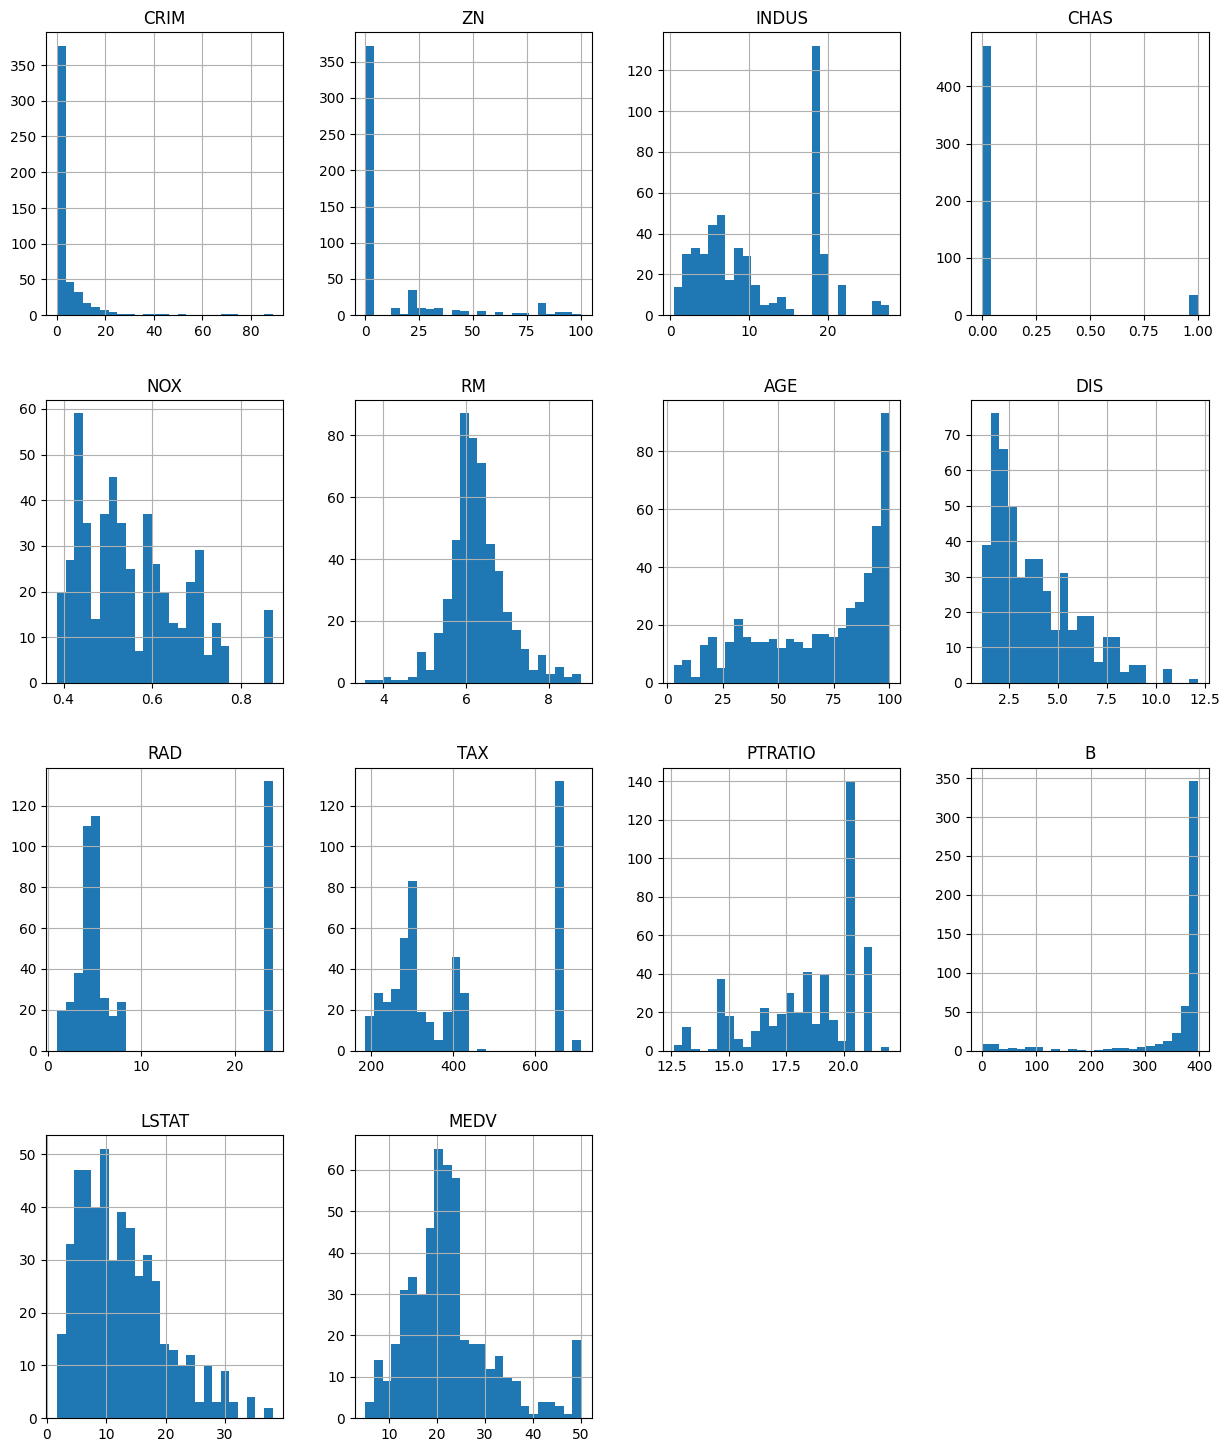

In [12]:
housing.hist(bins=25,figsize=(15,18))

## Step 1 after Looking Data Splitting and Making test set and train set
 

In [13]:
def split_test_train(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    train_indices = shuffled[test_set_size:]
    test_indices = shuffled[:test_set_size]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set ,test_set = split_test_train(housing,0.2)
print(f'{len(train_set)},\n{len(test_set)}')

405,
101


## Step 1.1 -> Stratified Shuffle Set is for lyaing epmphasis on specific Data Row , Like MEDV RM . Stratified Shuffle Spit , Splits test set and Train set using test_size

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1,  test_size = 0.2, random_state = 42)
for train_index, test_index in  split.split(housing,housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [16]:
strat_train_set.value_counts()


CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS     RAD  TAX  PTRATIO  B       LSTAT  MEDV
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900  1    296  15.3     396.90  4.98   24.0    1
1.19294   0.0   21.89  0     0.624  6.326  97.7   2.2710  4    437  21.2     396.90  12.26  19.6    1
1.49632   0.0   19.58  0     0.871  5.404  100.0  1.5916  5    403  14.7     341.60  13.28  19.6    1
1.46336   0.0   19.58  0     0.605  7.489  90.8   1.9709  5    403  14.7     374.43  1.73   50.0    1
1.42502   0.0   19.58  0     0.871  6.510  100.0  1.7659  5    403  14.7     364.31  7.39   23.3    1
                                                                                                   ..
0.12083   0.0   2.89   0     0.445  8.069  76.0   3.4952  2    276  18.0     396.90  4.21   38.7    1
0.11747   12.5  7.87   0     0.524  6.009  82.9   6.2267  5    311  15.2     396.90  13.27  18.9    1
0.11504   0.0   2.89   0     0.445  6.163  69.6   3.4952  2    276  18.0     391.83  11

In [17]:
strat_test_set.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE   DIS     RAD  TAX  PTRATIO  B       LSTAT  MEDV
0.00906   90.0  2.97   0     0.400  7.088  20.8  7.3073  1    285  15.3     394.72  7.85   32.2    1
0.53700   0.0   6.20   0     0.504  5.981  68.1  3.6715  8    307  17.4     378.35  11.65  24.3    1
1.65660   0.0   19.58  0     0.871  6.122  97.3  1.6180  5    403  14.7     372.80  14.10  21.5    1
1.61282   0.0   8.14   0     0.538  6.096  96.9  3.7598  4    307  21.0     248.31  20.34  13.5    1
1.27346   0.0   19.58  1     0.605  6.250  92.6  1.7984  5    403  14.7     338.92  5.50   27.0    1
                                                                                                  ..
0.07151   0.0   4.49   0     0.449  6.121  56.8  3.7476  3    247  18.5     395.15  8.44   22.2    1
0.07022   0.0   4.05   0     0.510  6.020  47.2  3.5549  5    296  16.6     393.23  10.11  23.2    1
0.06888   0.0   2.46   0     0.488  6.144  62.2  2.5979  3    193  17.8     396.90  9.45   36.2 

In [18]:
housing = strat_train_set.copy()

In [19]:
housing_matrix =  housing.corr()
housing_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## Step 2 -> Plotting The Graph Based on Corelations

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

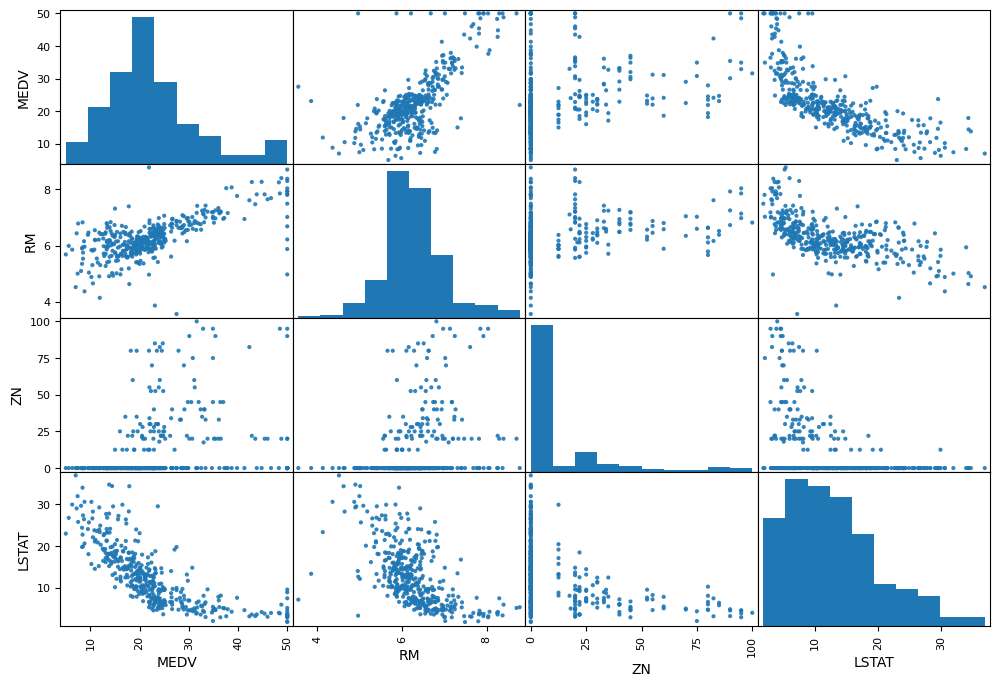

In [20]:
from pandas.plotting import scatter_matrix
Attr = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[Attr],figsize=(12,8),alpha=0.9)

<Axes: xlabel='TAXRM', ylabel='MEDV'>

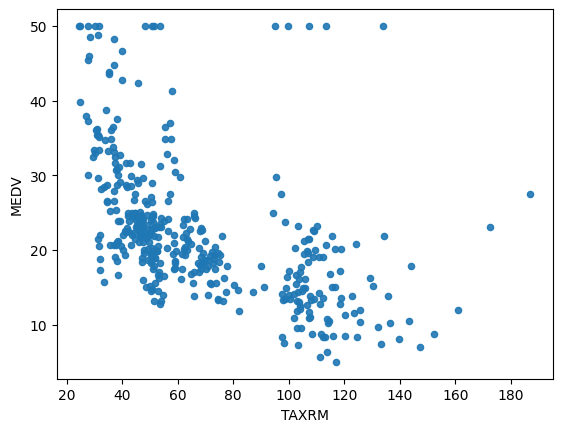

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.9)

## Step 3 -> Droping The MEDV Coloumn From Housing for Training the data aka feeatures , And Addinng MEDV To labels to make labels for the features .  Labels Are Nothing But Results

In [22]:
housing = strat_train_set.drop('MEDV',axis=1)
housin_labels = strat_train_set['MEDV'].copy()

## Step 4 -> Using Simple Imputer To Set The Missing Values



In [23]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
impute.fit(housing)


SimpleImputer(strategy='median')

In [24]:
impute.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [25]:
X = impute.transform(housing)

housing_tr = pd.DataFrame(X, columns=housing.columns)


In [26]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Step 5->  Using Pipeline To Automate Imputer

In [27]:

my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])


In [28]:
housing_num_tr = my_pipeline.fit_transform(housing)


In [29]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Step 6 -> Training The Model

## Step 6.1 -> Housing_num_tr takes the data automated by pipeline and Takes Housing_labels as data set 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_num_tr,housin_labels)


RandomForestRegressor()

## Step 6.2 -> Taking 5 Data Sets , some_data and some_labels take upto 5 Data and Transform it using my_pipeline And predicting the data (prepared_data)

In [31]:
some_data = housing.iloc[:5]
some_labels = housin_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.393, 25.548, 16.271, 23.436, 23.64 ])

In [32]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Always Housing_num_tr is taken cuz it Contains the Data Automated by the pipeline formed , Lets say the data is missing then it will automated by Simple Imputer in Pipeline

## Step 6.3 -> Finding mean squared , (Actual data - Preedicted Data)*2 and Then Finding root of the mse 

In [33]:
from sklearn.metrics import mean_squared_error
housing_predict = model.predict(housing_num_tr)
linmse = mean_squared_error(housin_labels,housing_predict)
rmse = np.sqrt(linmse)
rmse


1.2501630081832131

# Better Validation

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housin_labels,scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [35]:
rmse_scores

array([2.93198965, 3.6211432 , 3.16173571, 4.05188248, 3.02249587])

In [36]:
def print_scores(scores):
    print("scores", scores)
    print("mean is",scores.mean())
    print("Std",scores.std())
    

In [37]:
print_scores(rmse_scores)

scores [2.93198965 3.6211432  3.16173571 4.05188248 3.02249587]
mean is 3.35784938057803
Std 0.4203057555568435


## Saving the model


In [38]:
from joblib import dump,load
dump(model,'testing.joblib')

['testing.joblib']

## Testing The Model

In [39]:
features = strat_test_set.drop('MEDV',axis=1)
Labels = strat_test_set['MEDV'].copy()

In [40]:
x_preapared_data = my_pipeline.transform(features)
final_predictions = model.predict(x_preapared_data)
mse = mean_squared_error(Labels,final_predictions)
mse

8.840850401960775

In [41]:
rmase = np.sqrt(mse)
rmase
print(final_predictions,list(Labels))

[24.795 11.731 25.807 22.054 18.742 15.224 19.768 14.934 31.684 41.458
 19.738 11.889 23.894 25.947 19.269 10.824 32.018 14.071 23.771 18.671
 19.384 18.051 18.298 21.571 18.757 31.944 16.621 33.221  8.677 33.698
 24.653 21.187 22.847 11.579 21.196 11.006 42.863 24.651 23.101 41.817
 24.045 29.295 20.484 20.837 19.399 33.575 44.42  20.114 20.264 21.506
 21.194 14.485 21.643 15.226 25.276 32.59  42.719 28.332 19.726 20.731
 46.224  9.958 19.018 25.07  14.797 33.152 19.786 18.314 18.79  33.993
 26.375 22.562 21.043 22.494 35.059 12.49  16.006 20.313 20.779 21.454
 22.273 21.131 14.318 22.905 21.303 21.219 14.456 21.033 21.963 23.502
 18.419 26.902  7.25  26.373 18.591 30.029 19.379 31.156 14.52  26.397
 21.186 20.859] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [42]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])